<a href="https://colab.research.google.com/github/minerva-mcgonagraph/chicken_and_doggo/blob/master/chicken_and_doggo_fastai_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN that distinguishes between a picture of a labradoodle and fried chicken

initialization and importing libraries

In [1]:
!wget --no-check-certificate \
    https://www.dropbox.com/s/4q6coicseieqinh/chicken_and_doggo_dataset.zip?dl=0 \
    -O /tmp/chicken_and_doggo_dataset.zip

--2019-05-31 17:36:01--  https://www.dropbox.com/s/4q6coicseieqinh/chicken_and_doggo_dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4q6coicseieqinh/chicken_and_doggo_dataset.zip [following]
--2019-05-31 17:36:01--  https://www.dropbox.com/s/raw/4q6coicseieqinh/chicken_and_doggo_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd581a95f61102236996ea99005.dl.dropboxusercontent.com/cd/0/inline/Ah9A8qIGlKipjxbyI6Vwcrj5vvTOprJ2dOWR8tkmoumiEFqHnAAy7f4d6BvuVSjs5aSTkSh2E0XkDhP30JhTn5dZTaOvlYjC7eG2DwWtrHy7QA/file# [following]
--2019-05-31 17:36:01--  https://ucd581a95f61102236996ea99005.dl.dropboxusercontent.com/cd/0/inline/Ah9A8qIGlKipjxbyI6Vwcrj5vvTOprJ2dOWR8tkmoumiEFqHnAAy7f4d6BvuVSjs5aSTkSh2E0XkDhP

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import zipfile
from fastai.vision import *
from fastai.metrics import error_rate

local_zip = '/tmp/chicken_and_doggo_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


Set batch size and image size - this is the size that images will be transformed to.

In [0]:
batch_size = 32
image_size = 150

Set base path. This is where the data is located.

In [0]:
PATH = '/tmp/chicken_and_doggo_dataset'

Code to retrieve the image classes. For a small set of classes like the ones here this would be easier to do manually, but using this code scales to much larger class sets.

This is done by first initializing a blank list, then running through all folders in the base directory while ignoring hidden folders (those that begin with a period). For each folder it finds, that name is added to the list. This also skips the 'models' folder, since that's not a class.

In [5]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.') and not d=='models':
        classes.append(d)
print("There are", len(classes), "classes:\n", classes)


There are 2 classes:
 ['doggo', 'chicken']


Make a function to create training and validation sets. This takes advantage of the fastai library to split the data. We'll also visualize the data.

There are 340 training images and 85 validation images.


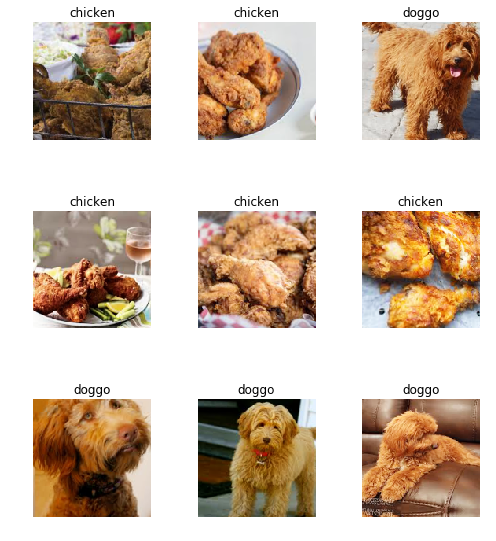

In [6]:
data = ImageDataBunch.from_folder(
    PATH, 
    ds_tfms=get_transforms(),
    size=image_size,
    bs=batch_size,
    valid_pct=0.2).normalize(imagenet_stats)
print("There are", len(data.train_ds), "training images and",
    len(data.valid_ds), "validation images.")
data.show_batch(rows=3, figsize=(7,8))

Now we'll build the CNN using resnet34. We can build an entire CNN using just a couple lines of code through the fastai library. The following will run mock trainings using different learning rates. Next we'll pick two learning rates to cycle between for the actual training.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


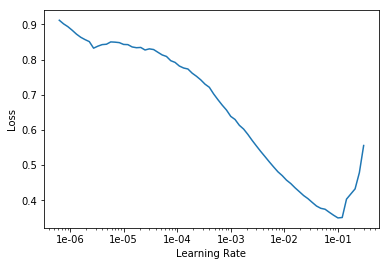

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.lr_find();
learn.recorder.plot()

Pick two learning rates: 0.01 and 0.001 (in the graph, these are labeled as 1e-02 and 1e-03 respectively). There's reasons for picking these two but that's beyond the scope of this documentation (for now). Retrain based on these learning rates.

In [11]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.270784,0.018164,0.988235,00:02
1,0.147814,0.045110,0.988235,00:02
2,0.138349,0.035738,0.988235,00:02
3,0.096478,0.022520,0.988235,00:02


That's it! A high accuracy classification model that doesn't require a lot of effort in tuning parameters. :) Don't forget to run the following to free up memory.

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)